<a href="https://colab.research.google.com/github/skywalker0803r/crypto/blob/main/%E4%B8%80%E9%8D%B5%E7%94%A2%E7%94%9F%E8%99%9B%E6%93%AC%E8%B2%A8%E5%B9%A3%E8%B2%B7%E8%B3%A3%E8%A8%8A%E8%99%9F(SMA%E7%AD%96%E7%95%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 產生訊號

All caught up..!


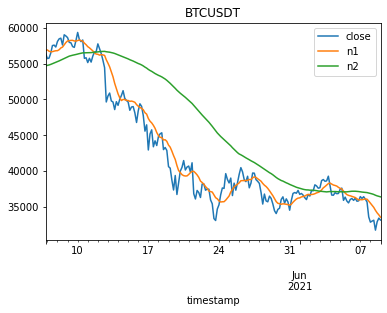

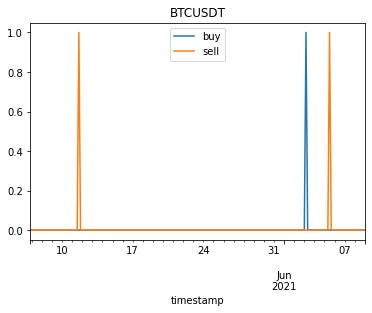

All caught up..!


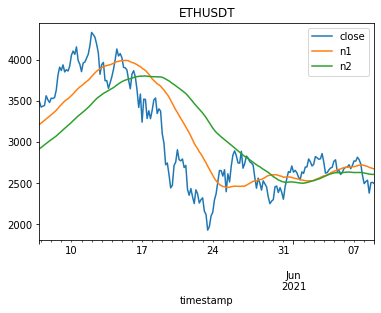

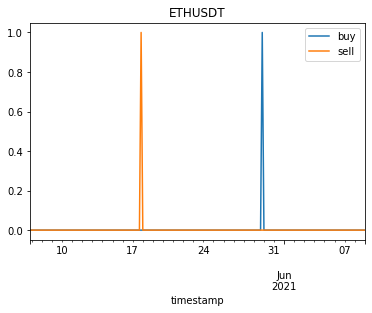

All caught up..!


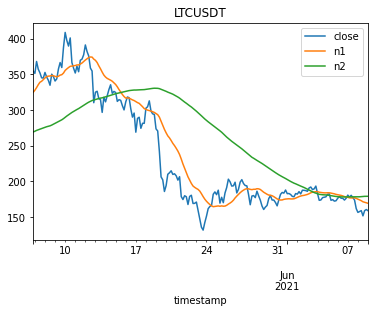

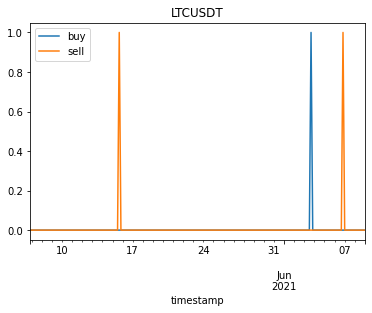

All caught up..!


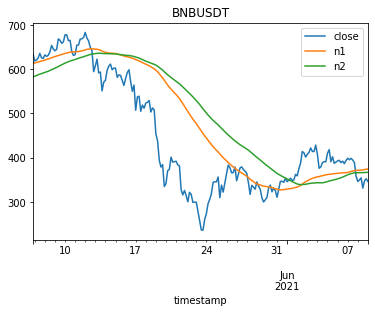

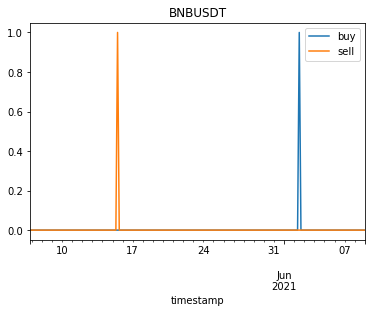

In [24]:
!pip install finlab_crypto > log.txt
import finlab_crypto
import matplotlib.pyplot as plt
import pandas as pd
 
# config
config = {}
config['BTC'] = {'n1':10,'n2':80} #UPDATE IN 2021/06/06
config['ETH'] = {'n1':35,'n2':70} #UPDATE IN 2021/06/06
config['LTC'] = {'n1':20,'n2':95} #UPDATE IN 2021/06/06
config['BNB'] = {'n1':60,'n2':85} #UPDATE IN 2021/06/06
 
lookback = 200

dfs = {}

for cname in config.keys():
  pair = '{}USDT'.format(cname)
  ohlcv = finlab_crypto.crawler.get_all_binance(pair,'4h')
  table = pd.DataFrame()
  table['close'] = ohlcv.close
  table['n1'] = ohlcv.close.rolling(config[cname]['n1']).mean()
  table['n2'] = ohlcv.close.rolling(config[cname]['n2']).mean()
  table.tail(lookback).plot(title=pair)
  plt.show()
  table['buy'] = ((table['n1'] > table['n2'])&(table['n1'].shift() < table['n2'].shift())).astype(int)
  table['sell'] = ((table['n1'] < table['n2'])&(table['n1'].shift() > table['n2'].shift())).astype(int)
  table[['buy','sell']].tail(lookback).plot(title=pair)
  dfs[pair] = table
  plt.show()

In [25]:
import numpy as np
pd.options.display.max_rows = 999
pair = 'BTCUSDT'
dfs[pair] = dfs[pair].replace(0,np.nan)
dfs[pair].dropna(subset=['buy','sell'],how='all').tail(10).style.background_gradient(subset=['buy','sell'])

,close,n1,n2,buy,sell
timestamp,,,,,
2021-03-29 08:00:00+00:00,57854.320000,56033.546000,55958.091125,1.000000,nan
2021-04-08 00:00:00+00:00,56540.620000,57122.782000,57339.334000,nan,1.000000
2021-04-09 20:00:00+00:00,58142.540000,57931.922000,57903.518375,1.000000,nan
2021-04-18 08:00:00+00:00,53308.920000,59218.903000,59860.506375,nan,1.000000
2021-04-29 04:00:00+00:00,54465.140000,54698.353000,54684.110375,1.000000,nan
2021-04-29 16:00:00+00:00,52860.020000,54329.910000,54379.819625,nan,1.000000
2021-04-30 04:00:00+00:00,54343.110000,54142.886000,54092.035750,1.000000,nan
2021-05-11 16:00:00+00:00,56608.940000,56504.184000,56580.147625,nan,1.000000
2021-06-03 04:00:00+00:00,38634.090000,37332.504000,37123.093875,1.000000,nan


In [26]:
pair = 'ETHUSDT'
dfs[pair] = dfs[pair].replace(0,np.nan)
dfs[pair].dropna(subset=['buy','sell'],how='all').tail(10).style.background_gradient(subset=['buy','sell'])

,close,n1,n2,buy,sell
timestamp,,,,,
2021-01-15 16:00:00+00:00,1133.740000,1145.071714,1146.804143,nan,1.000000
2021-01-18 16:00:00+00:00,1227.670000,1185.295429,1181.770857,1.000000,nan
2021-02-24 16:00:00+00:00,1599.200000,1814.533714,1816.045714,nan,1.000000
2021-03-06 12:00:00+00:00,1544.410000,1532.675714,1526.910571,1.000000,nan
2021-03-19 20:00:00+00:00,1809.100000,1807.726857,1810.156000,nan,1.000000
2021-03-31 12:00:00+00:00,1849.090000,1734.252000,1729.845714,1.000000,nan
2021-04-22 12:00:00+00:00,2610.580000,2295.948286,2296.443143,nan,1.000000
2021-04-26 00:00:00+00:00,2455.160000,2325.138571,2324.493286,1.000000,nan
2021-05-17 20:00:00+00:00,3282.510000,3794.902857,3795.780714,nan,1.000000


In [27]:
pair = 'LTCUSDT'
dfs[pair] = dfs[pair].replace(0,np.nan)
dfs[pair].dropna(subset=['buy','sell'],how='all').tail(10).style.background_gradient(subset=['buy','sell'])

,close,n1,n2,buy,sell
timestamp,,,,,
2021-02-03 16:00:00+00:00,152.820000,138.826500,138.273158,1.000000,nan
2021-02-24 00:00:00+00:00,183.890000,205.335000,205.378211,nan,1.000000
2021-03-08 20:00:00+00:00,191.850000,184.577000,183.747789,1.000000,nan
2021-03-21 16:00:00+00:00,196.680000,200.772000,201.169789,nan,1.000000
2021-03-31 16:00:00+00:00,193.050000,192.355500,192.124737,1.000000,nan
2021-04-23 04:00:00+00:00,223.840000,259.309000,260.275474,nan,1.000000
2021-05-01 08:00:00+00:00,272.200000,260.991000,260.768316,1.000000,nan
2021-05-15 16:00:00+00:00,306.330000,321.956500,325.366105,nan,1.000000
2021-06-03 16:00:00+00:00,189.630000,185.243000,184.434526,1.000000,nan


In [28]:
pair = 'BNBUSDT'
dfs[pair] = dfs[pair].replace(0,np.nan)
dfs[pair].dropna(subset=['buy','sell'],how='all').tail(10).style.background_gradient(subset=['buy','sell'])

,close,n1,n2,buy,sell
timestamp,,,,,
2021-03-03 12:00:00+00:00,245.287100,240.275340,241.614847,nan,1.000000
2021-03-10 00:00:00+00:00,273.242800,237.315412,237.306791,1.000000,nan
2021-03-21 20:00:00+00:00,264.651300,264.821868,265.290015,nan,1.000000
2021-03-28 20:00:00+00:00,268.426300,259.336917,259.274289,1.000000,nan
2021-03-29 12:00:00+00:00,272.273500,259.864337,259.871813,nan,1.000000
2021-03-31 20:00:00+00:00,302.372400,266.617045,266.481751,1.000000,nan
2021-04-24 04:00:00+00:00,514.400000,527.854610,528.745635,nan,1.000000
2021-04-28 08:00:00+00:00,560.140000,529.208852,528.226679,1.000000,nan
2021-05-15 12:00:00+00:00,586.010000,632.696500,633.017176,nan,1.000000
